# Trabajo final HCC

### En este trabajo lo que haremos es realizar un algoritmo para calcular la dimension fractal de una distribución de galaxias a gran escala, utilizando el método de esferas crecientes. Estimaremos la dimensión de la distribución espacial de una muestra de 119 790 galaxias extraídas del SDSS NASA/AMES Value Added Galaxy Catalog (AMES-VAGC) utilizando la definición de dimensión de correlación.

### 1. Lectura y analisis de nuestros datos.

#### Leemos nuestro archivo y vemos que datos tenemos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipyvolume as ipv
from ipywidgets import interact, interact_manual, widgets
from scipy.optimize import curve_fit
from matplotlib.ticker import MultipleLocator
import warnings
import random
sns.set_style('whitegrid')

%matplotlib inline

data=pd.read_csv(r'/home/anakin/Documents/HCC/proyecto-HCC/asu1.tsv', sep='|')



In [3]:
data.head(120000)

,X,Y,Z,RAJ2000,DEJ2000,z
0,-0.04896,0.06025,0.08893,129.093602,48.880112,0.118053
1,-0.04927,0.06013,0.08913,129.333969,48.906245,0.118268
2,-0.04945,0.06031,0.08926,129.350815,48.856141,0.118536
3,-0.04775,-0.00249,0.09856,182.990895,64.120498,0.109542
4,-0.04469,-0.00259,0.09177,183.316143,63.997007,0.102103
...,...,...,...,...,...,...
119785,-0.09209,0.02906,0.01642,162.486864,9.651224,0.097955
119786,-0.09187,0.02883,0.01634,162.577575,9.628749,0.097664
119787,-0.08247,0.02693,0.01512,161.916365,9.889721,0.088059
119788,-0.09290,0.03025,0.01698,161.961011,9.860375,0.099168


#### Calculamos las distancias utilizando el redshift

In [5]:
rs=data['z']

cl=299792 #velocidad de la luz
h=0.6767 #parámetro de Hubble
dist=rs*cl/(h*100)    

#### Vemos la distribución espacial de nuestra muestra de galaxias.

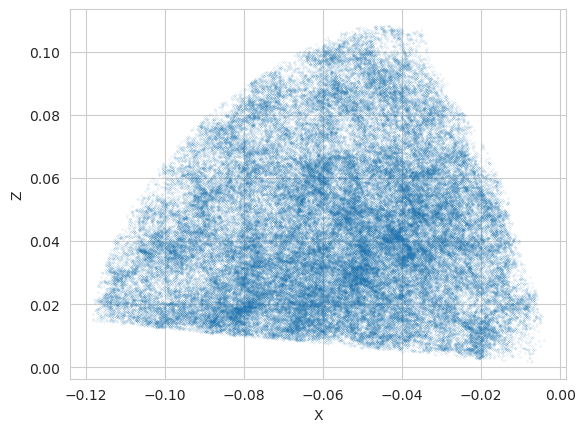

In [6]:
fig, ax=plt.subplots(1,1)

x=data['X']
y=data['Y']
z=data['Z']
alfa=data['RAJ2000']
delta=data['DEJ2000']
plt.scatter(x,z,s=0.005);
ax.set_xlabel('X')
ax.set_ylabel('Z');

#### Transformamos las x,y,z a Mpc

In [7]:
x1=dist*np.cos(alfa)*np.cos(delta)
y1=dist*np.sin(alfa)*np.cos(delta)
z1=dist*np.sin(delta)

#### Graficamos las distancias de nuestras galaxias.


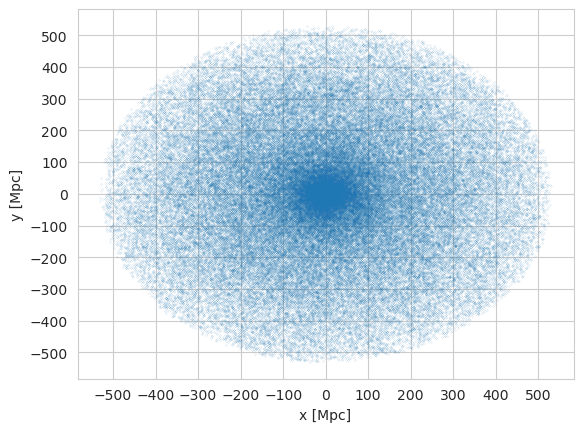

In [8]:
fig, ax=plt.subplots(1,1)

plt.scatter(x1,y1,s=0.005);
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.set_xlabel('x [Mpc]')
ax.set_ylabel('y [Mpc]')
plt.savefig("distribucion_espacial.jpeg");

### 2. Calculo de la dimensión fractal utilizando una sola galaxia.

#### Definimos la funcion que cuenta la cantidad de galaxias dentro de una esfera de radio r.


In [9]:
N=len(dist)

def spheres(x0,y0,z0,radio):
    
    d=np.zeros(N)
    gc=0

    for i in range(N):
    
        d[i]=np.sqrt((x1[i]-x0)**2+(y1[i]-y0)**2+(z1[i]-z0)**2)
        
        if (d[i]<=radio/h and d[i]!=0):
        
            gc=gc+1
            
    return gc

#### Ahora vamos a calcular la dimension fractal D con una sola esfera centrada en la Milky Way (MW), a modo de prueba.

#### Utilizando que el centro de la MW es (0,0,0)

In [10]:
rr=[]
c=[]
for r in range(0,192,2):

    MW=spheres(0,0,0,r)
    rr.append(r)
    c.append(MW)

In [11]:
c = np.array(c)
rr = np.array(rr)

#### Graficamos la cantidad de galaxias vs r[Mpc] y fiteamos los puntos para calcular los parametros a y D, utilizando una ley de potencias, $N(r)=a.r^D$

[0.00297049 2.96826211]
[[ 1.08955196e-07 -7.17498813e-06]
 [-7.17498813e-06  4.72868154e-04]]


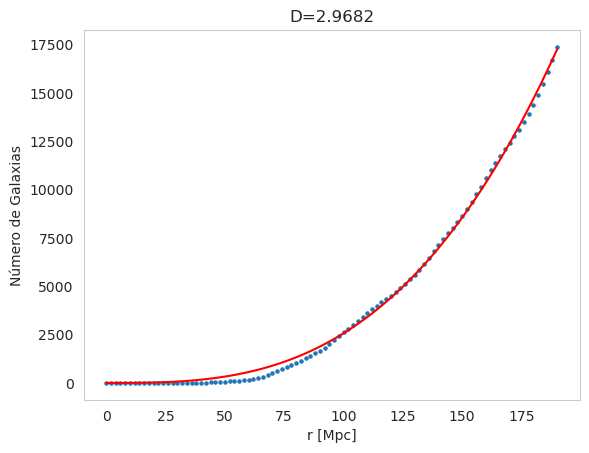

In [15]:
fig, ax=plt.subplots(1,1)
    
def funcion (x,a,b):

    return a*x**b

res,cov =curve_fit(funcion, rr, c)
ax.plot(rr, funcion(rr, 0.00297049 ,2.96826211),color='red')
plt.scatter(rr, c, s=5)
ax.set_title('D=2.9682')
ax.set_xlabel('r [Mpc]')
ax.set_ylabel('Número de Galaxias')
plt.grid()
print(res)
print(cov);



#### Aquí lo que obtenemos es por un lado el valor de la constante a y la constante D, que es la dimensión fractal. Y por otro obtenenos tambien la matriz de varianza-covarianza.

### 3. Calculamos la dimensión utilizando la ley de potencias.

#### Vamos a calcular la dimensión D tomando un promedio de las 100 galaxias y ajustando con la ley de potencias mencionada anteriormente.

#### Tomamos 100 galaxias al azar, lejos del borde, como galaxias centrales para generar las esferas.

In [16]:
M=100
N=119790
rmax=300

#### Elegimos de manera aleatoria las 100 galaxias centrales, cuya distancia tiene que ser menor a 150 Mpc

In [30]:
muestra=data.sample(4500)

In [31]:
redshift=muestra['z']
alf=muestra['RAJ2000']
delt=muestra['DEJ2000']

In [32]:
d=redshift*cl/(h*100)

In [33]:
xcent=d*np.cos(alf)*np.cos(delt)
ycent=d*np.sin(alf)*np.cos(delt)
zcent=d*np.sin(delt)

In [34]:
xcent=np.array(xcent)
ycent=np.array(ycent)
zcent=np.array(zcent)

In [35]:
xc=[]
yc=[]
zc=[]

for i in range(len(xcent)):
    
    distancia=np.sqrt((xcent[i])**2+(ycent[i])**2+(zcent[i])**2)

    if distancia < 150:
        
        xc.append(xcent[i])
        yc.append(ycent[i])
        zc.append(zcent[i])

In [ ]:
xc=np.array(xc)
yc=np.array(yc)
zc=np.array(zc)

#### Aquí lo que haremos es calcular para cada radio r, variandolo de a 2 Mpc, la sumatoria "suma" del conteo de galaxias para las esferas, de radio r, de las 100 galaxias centrales.

In [37]:
suma=[]
suma2=[]
for r in range(0,rmax,2):
    
    aux=0
    
    for i in range(M):
        
        c=np.zeros(M)
    
        galax=spheres(xc[i],yc[i],zc[i],r)
        
        c[i]=galax
        
        aux= aux + c[i]
        
    if r < 192:
            
        suma2.append(aux)
            
    suma.append(aux)


NameError: name 'tabla2' is not defined

In [38]:
ni=np.array(suma)
ni_p=np.array(suma2)

In [39]:
ra=[]
for j in range(0,192,2):
    
    ra.append(j)
    

In [40]:
ra=np.array(ra)
print(len(ra),len(ni_p))

96 96


 #### Graficamos la cantidad de galaxias tomando el promedio de las 100 galaxias cebtrales vs r[Mpc] y fiteamos los puntos para calcular los parametros a y D, utilizando una ley de potencias, $N(r)=a.r^D$antidad de galaxias vs r[Mpc] y fiteamos los puntos para calcular los parametros a y D, utilizando una ley de potencias, $N(r)=a.r^D$


[2.63311383e-03 3.01104706e+00]
[[ 9.75686088e-09 -7.24600818e-07]
 [-7.24600818e-07  5.38548183e-05]]


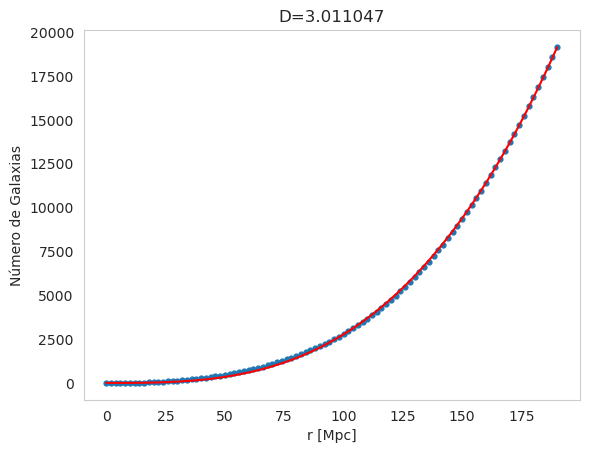

In [43]:
fig, ax=plt.subplots(1,1)
    
def funcion2 (y,v,g):

    return v*y**g

resu,cova =curve_fit(funcion2, ra, ni_p/M)
ax.plot(ra, funcion2(ra, 0.00263311 ,3.011047),color='red', lw=1.5)
plt.scatter(ra, ni_p/M, s=12)
ax.set_title('D=3.011047')
ax.set_xlabel('r [Mpc]')
ax.set_ylabel('Número de Galaxias')
plt.grid()
print(resu)
print(cova)
plt.savefig("dimension_promedio.eps");

### 4. Calculamos la dimensión de correlación.

#### La dimension de correlación esta dada por $D_{2}(r)= \frac{Log C_{2}(r+1)-Log C_{2}(r)}{Log(r+1)-Log(r)}$

#### Donde $C_{2}(r)=\frac{1}{NM} \sum_{i=1}^{M}n_{i}(r)$

#### N es el numero total de galaxias de la muestra, M es el numero de galaxias centrales para las esferas y $n_{i}$ es el numero de galaxias contadas dentro de la i-ésima esfera.

#### Aquí calculamos el parámetro C2(r) y la dimensión D2(r) antes mencionadas. Donde N es el número total de galaxias de la muestra y M es el número de galaxias centrales para las esferas crecientes.

In [44]:
radio=[]
for i in range(0,rmax,2):
    radio.append(i)
radio=np.array(radio)

In [45]:
warnings.filterwarnings("ignore")

C2=np.zeros(len(ni))
D2=np.zeros(len(ni)-1)

for i in range(len(ni)):
    
    C2[i]=(1/(N*M))*ni[i]
    

for r in range(len(ni)-1):
    
    D2[r]=(np.log10(C2[r+1])-np.log10(C2[r]))/(np.log10(radio[r+1])-np.log10(radio[r]))

In [46]:
radio=[]
for i in range(0,rmax-2,2):
    radio.append(i)

In [49]:
radios=np.array(radio)

#### Graficamos la dimensión de correlación vs el radio.

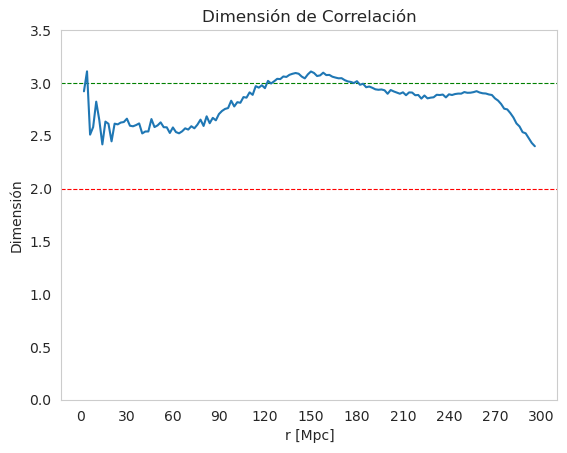

In [50]:
fig, ax=plt.subplots(1,1)
plt.grid()

ax.set_xlabel('r [Mpc]')
ax.set_ylabel('Dimensión')
plt.axhline(y=2, color='red', ls='--', lw='0.8')
plt.axhline(y=3, color='green', ls='--',lw='0.8')
ax.set_title('Dimensión de Correlación')
ax.set_ylim([0,3.5])

ax.xaxis.set_major_locator(MultipleLocator(30))
ax.plot(radios,D2)
plt.savefig("dimension_correlacion.eps");